In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel("Parkisons Dataset 1 Final (2).xlsx")

data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


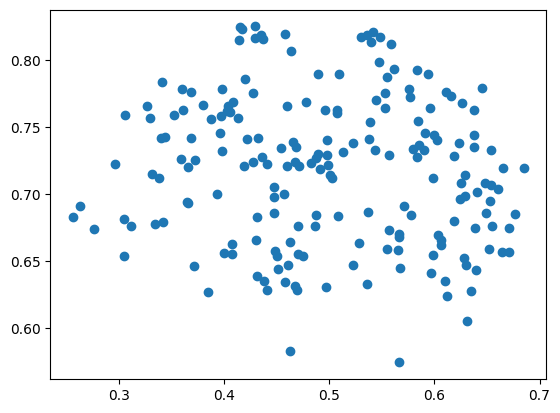

In [11]:
#A1

#selecting two columns from dataset
x1 = data['RPDE']
x2 = data['DFA']

#scatter plot for the selected dataset
plt.scatter(x1,x2)
plt.show()


Coefficients: 
 [-0.00020281]
Mean squared error: 0.01
Coefficient of determination: -0.37


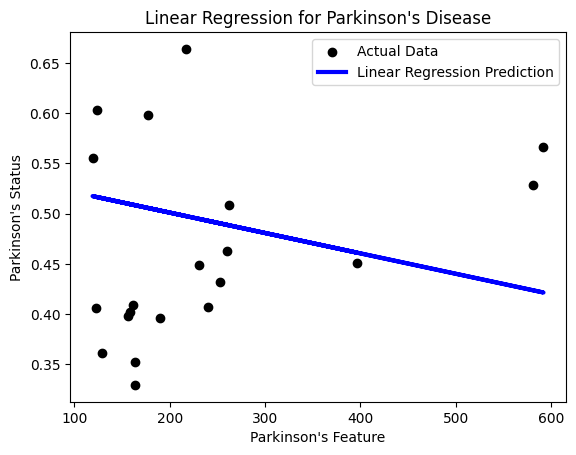

In [25]:
parkinson_X = data.drop(columns=['RPDE'])
parkinson_y = data['RPDE']

# Use only one feature
parkinson_X = parkinson_X.iloc[:, 2]  # Replace "2" with the index of the feature you want

# Split the data into training/testing sets
parkinson_X_train = parkinson_X[:-20]
parkinson_X_test = parkinson_X[-20:]

# Split the targets into training/testing sets
parkinson_y_train = parkinson_y[:-20]
parkinson_y_test = parkinson_y[-20:]

parkinson_X_train = np.array(parkinson_X_train).reshape(-1, 1)
parkinson_X_test = np.array(parkinson_X_test).reshape(-1, 1)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(parkinson_X_train, parkinson_y_train)

# Make predictions using the testing set
parkinson_y_pred = regr.predict(parkinson_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(parkinson_y_test, parkinson_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(parkinson_y_test, parkinson_y_pred))

# Plot outputs
plt.scatter(parkinson_X_test, parkinson_y_test, color="black", label="Actual Data")
plt.plot(parkinson_X_test, parkinson_y_pred, color="blue", linewidth=3, label="Linear Regression Prediction")


# Add labels and title
plt.xlabel("Parkinson's Feature")  # Replace with an appropriate feature name
plt.ylabel("Parkinson's Status")
plt.title("Linear Regression for Parkinson's Disease")

plt.legend()

plt.show()

In [33]:
X = data[['RPDE']]
y = data['status']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Print the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Coefficients: [1.28209756]
Intercept: 0.11467495789157622
Mean Squared Error: 0.1678940641694721
R-squared: 0.09521374857650544
